In [1]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [19]:
text = pd.read_csv("E:\\PSU\\Course PPT\\SODA 501\\Final Project\\Entire Data\\Disney.csv")
text

Unnamed: 0                created_at geo.coordinates.type  \
0               0  2019-01-01T04:05:12.000Z                  NaN   
1               1  2019-01-01T11:26:38.000Z                  NaN   
2               2  2019-01-01T16:48:26.000Z                Point   
3               3  2019-01-01T18:55:52.000Z                  NaN   
4               4  2019-01-01T20:42:27.000Z                  NaN   
...           ...                       ...                  ...   
22877         332  2015-12-22T18:27:45.000Z                  NaN   
22878         334  2015-12-24T18:40:52.000Z                Point   
22879         335  2015-12-27T21:54:13.000Z                  NaN   
22880         336  2015-12-28T06:08:46.000Z                  NaN   
22881         337  2015-12-30T07:42:40.000Z                  NaN   

           geo.place_id                   id lang  possibly_sensitive  \
0      55b4f9e5c516e0b6  1079951648175390720   en               False   
1      55b4f9e5c516e0b6  1080062738129399811   en               False   
2      55b4f9e5c516e0b6  1080143725131644929   en               False   
3      55b4f9e5c516e0b6  1080175792913506304   en               False   
4      55b4f9e5c516e0b6  1080202617840648193   en               False   
...                 ...                  ...  ...                 ...   
22877  55b4f9e5c516e0b6   679367738318540801   en               False   
22878  55b4f9e5c516e0b6   680095812853063680   en               False   
22879  55b4f9e5c516e0b6   681231635350712321   en               False   
22880  55b4f9e5c516e0b6   681356096251019264   en               False   
22881  55b4f9e5c516e0b6   682104499377442816   en               False   

       public_metrics.like_count  public_metrics.quote_count  \
0                              9                           0   
1                              1                           0   
2                              0                           0   
3                              0                           1   
4                              1                           0   
...                          ...                         ...   
22877                          0                           0   
22878                          1                           0   
22879                          4                           0   
22880                          4                           0   
22881                          0                           0   

       public_metrics.reply_count  ...           user_created_at  \
0                               1  ...  2011-12-04T22:14:12.000Z   
1                               0  ...  2009-06-30T14:52:35.000Z   
2                               0  ...  2014-06-25T23:33:08.000Z   
3                               0  ...  2018-06-22T18:12:40.000Z   
4                               0  ...  2010-08-12T03:31:48.000Z   
...                           ...  ...                       ...   
22877                           0  ...  2008-09-27T14:39:32.000Z   
22878                           0  ...  2009-03-31T07:48:21.000Z   
22879                           0  ...  2012-06-14T18:38:56.000Z   
22880                           0  ...  2015-11-23T22:41:34.000Z   
22881                           0  ...  2009-03-13T00:00:05.000Z   

                                        user_description              user_id  \
0                                                    NaN            428549905   
1      Connoisseur of the bright and colorful. Propon...             52414714   
2                             nail ,wax, and lash artist           2588407830   
3      Making it a priority to find the latest news a...  1010224065087406080   
4                                                    NaN            177434705   
...                                                  ...                  ...   
22877  @BlackGryph0n's Official #1 Fan! Head of & run...             16486050   
22878  INFAMY ENTERTAINMENT CEO, V-103 RADIO ATL, LUD...             27834261  

In [20]:
text['text'].values.tolist()
Text_List = text['text'].values.tolist()
Text_List

['Had a great day at Disney with @Carolinemray13 , now ready for the New Year and some #kentuckyfootball tomorrow! https://t.co/NvH9TWVvtY',
 "Disney: Welcome to the 30th anniversary of Disney's Hollywood Studios!\n\nCrowd: *CHEERS*\n\nDisney:...which will now be called Disneys Cinemagique XL Storyverse Park! https://t.co/xgACG6dHCZ",
 '#pooh nails by fusionnails  cute cute cute..\n#disney  #disneyworld  #winniethepooh  #red #yellow #hunny #orlandoflorida  #orlandodowntown  #orlandoblogger  #orlandomom  #orlando… https://t.co/ceZDGsIT9O',
 'Here’s a first look at #CaptainMarvel, who will debut at various parks and on Disney Cruise Line this year.\n\nhttps://t.co/Uq1uzeNWuQ https://t.co/ZhH45Xgerp',
 'Disney springs is so fucking busy today. And I’m already annoyed so it just keeps getting worse 🙂🙂',
 '@thetimtracker #TrackerQA What are some theme parks you want to visit that you haven’t yet that aren’t Disney? Can include outside of the U.S. 🎆',
 'my mom told me that in 2019 I should h

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True, min_len=3))

data_words = list(sent_to_words(Text_List))
print(data_words)

[['had', 'great', 'day', 'disney', 'with', 'carolinemray', 'now', 'ready', 'for', 'the', 'new', 'year', 'and', 'some', 'tomorrow', 'https', 'nvh', 'twvvty'], ['disney', 'welcome', 'the', 'anniversary', 'disney', 'hollywood', 'studios', 'crowd', 'cheers', 'disney', 'which', 'will', 'now', 'called', 'disneys', 'cinemagique', 'storyverse', 'park', 'https', 'xgacg', 'dhcz'], ['pooh', 'nails', 'fusionnails', 'cute', 'cute', 'cute', 'disney', 'disneyworld', 'winniethepooh', 'red', 'yellow', 'hunny', 'orlandoflorida', 'orlandodowntown', 'orlandoblogger', 'orlandomom', 'orlando', 'https', 'cezdgsit'], ['here', 'first', 'look', 'captainmarvel', 'who', 'will', 'debut', 'various', 'parks', 'and', 'disney', 'cruise', 'line', 'this', 'year', 'https', 'uzenwuq', 'https', 'zhh', 'xgerp'], ['disney', 'springs', 'fucking', 'busy', 'today', 'and', 'already', 'annoyed', 'just', 'keeps', 'getting', 'worse'], ['thetimtracker', 'trackerqa', 'what', 'are', 'some', 'theme', 'parks', 'you', 'want', 'visit', 't

In [22]:
bigram = gensim.models.Phrases(data_words, min_count=20)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['com', 'www', 'txsmrcqpuc', 'kswqnmjp', 'olmpktwsx', 'https', 'http', 'year', 'still'])

In [33]:
import en_core_web_sm
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])
print(data_lemmatized)

[['great', 'day', 'ready', 'tomorrow'], ['cheer', 'disney'], ['cute'], ['first', 'captainmarvel', 'debut', 'various', 'park'], ['busy', 'today', 'already', 'bad'], ['thetimtracker', 'visit', 'yet', 'outside'], ['less', 'date', 'actor', 'happy'], ['love', 'gamesin'], ['much'], ['restaurant', 'amazing', 'great', 'food', 'great', 'entertainment', 'blast', 'many', 'reason'], ['world', 'information', 'guest', 'basketball', 'fan', 'exciting', 'action', 'summer'], ['couple', 'day', 'universal', 'finally', 'egg', 'day', 'good', 'thing', 'mantyke'], ['trip', 'soccer', 'showcase', 'fccopa', 'bond', 'strong'], ['amazing', 'experience', 'family', 'friend', 'family', 'dance', 'team', 'yesterday', 'great', 'time', 'many', 'laugh', 'ready', 'hug', 'sunny', 'omjtkm'], ['world'], ['much', 'disney'], [], ['lot', 'honestly', 'hard', 'waterpark', 'pass', 'go'], ['gift', 'morning', 'tough', 'football', 'season', 'great', 'trip', 'crowd', 'important', 'time', 'uagirxgtfs'], ['magical', 'power'], ['football'

In [34]:
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=0.015, no_above=0.8) #Filter out words that occur less than 1.5% documents, or more than 70% of the documents.
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1)], [(6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1)], [(26, 1)], [(1, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(0, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(1, 1), (2, 1), (27, 1), (31, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(41, 1)], [(5, 1), (26, 1)], [], [(66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(1, 1), (54, 1), (64, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(80, 1), (81, 1)], [(13, 1), (73, 1), (82, 1), (83, 1)], [(41, 1)], [(0, 2), (31, 1), (41, 2), (57, 1), (58, 1), (84, 1), (85, 1), (86, 1), (87, 1

In [36]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 13758
Number of documents: 22882


# Compute Coherence Values

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

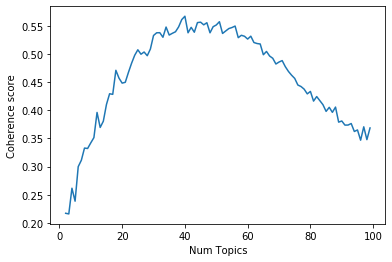

In [47]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=100, step=1)
# Show graph
limit=100; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the Number of Topic

In [57]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [58]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"week" + 0.047*"magical" + 0.043*"thank" + 0.040*"year" + '
  '0.034*"awesome" + 0.027*"open" + 0.019*"princess" + 0.019*"lol" + '
  '0.017*"close" + 0.016*"beer"'),
 (1,
  '0.102*"day" + 0.042*"waltdisneyworld" + 0.035*"vacation" + 0.030*"favorite" '
  '+ 0.023*"well" + 0.021*"movie" + 0.021*"guy" + 0.020*"weekend" + '
  '0.019*"amp" + 0.017*"orlando_international"'),
 (2,
  '0.071*"disneyworld" + 0.064*"night" + 0.063*"back" + 0.046*"tonight" + '
  '0.046*"people" + 0.034*"food" + 0.024*"show" + 0.024*"photo" + 0.022*"sad" '
  '+ 0.021*"adventure"'),
 (3,
  '0.182*"today" + 0.072*"downtown" + 0.036*"first" + 0.034*"garden" + '
  '0.028*"airport" + 0.019*"line" + 0.019*"ice" + 0.018*"already" + '
  '0.015*"perfect" + 0.014*"center"'),
 (4,
  '0.071*"ride" + 0.032*"work" + 0.029*"magic" + 0.028*"long" + 0.024*"flight" '
  '+ 0.020*"hotel" + 0.017*"head" + 0.017*"literally" + 0.016*"early" + '
  '0.014*"free"'),
 (5,
  '0.090*"time" + 0.059*"great" + 0.052*"love" + 0.043*"